# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [2]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,0.0,0.0
2024-06-25 00:00:00-04:00,5460.729980,5472.879883,5446.560059,5469.299805,3591960000,0.0,0.0
2024-06-26 00:00:00-04:00,5460.709961,5483.140137,5451.870117,5477.899902,3563920000,0.0,0.0
2024-06-27 00:00:00-04:00,5473.589844,5490.810059,5467.540039,5482.870117,3589530000,0.0,0.0
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,0.0,0.0


In [3]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [4]:
dfo.options  #to get the date of different expiration time

('2024-07-01',
 '2024-07-02',
 '2024-07-03',
 '2024-07-05',
 '2024-07-08',
 '2024-07-09',
 '2024-07-10',
 '2024-07-11',
 '2024-07-12',
 '2024-07-15',
 '2024-07-16',
 '2024-07-17',
 '2024-07-18',
 '2024-07-19',
 '2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-09',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-10-31',
 '2024-11-15',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-07-18',
 '2025-09-19',
 '2025-12-19',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [5]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [6]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240702C04000000,2024-06-13 15:43:08+00:00,4000.0,1430.33,1468.5,1477.1,0.00000,0.000000,1.0,1,1.672426,True,REGULAR,USD
1,SPXW240702C04550000,2024-06-10 16:20:55+00:00,4550.0,820.95,918.7,927.3,0.00000,0.000000,1.0,1,1.077153,True,REGULAR,USD
2,SPXW240702C04700000,2024-05-23 17:17:52+00:00,4700.0,630.40,767.1,784.4,0.00000,0.000000,NaN,0,0.961365,True,REGULAR,USD
3,SPXW240702C04800000,2024-06-27 14:27:49+00:00,4800.0,691.77,669.1,677.3,0.00000,0.000000,1.0,2,0.818514,True,REGULAR,USD
4,SPXW240702C04850000,2024-06-28 17:09:15+00:00,4850.0,640.03,619.7,626.6,156.93002,32.483963,20.0,0,0.765627,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [8]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]  #to remove nan
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [9]:
vol = annual_vol(df)
vol

0.15785470463835274

# **BLACK-SCHOLES MODEL**


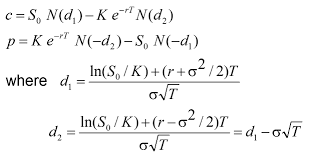

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [10]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [11]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [12]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
4000.0,1460.480217
4550.0,910.480249
4700.0,760.480258
4800.0,660.480264
4850.0,610.480271


In [13]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
4000.0,1430.33
4550.0,820.95
4700.0,630.40
4800.0,691.77
4850.0,640.03


In [14]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
4000.0,1460.480217,1430.33
4550.0,910.480249,820.95
4700.0,760.480258,630.40
4800.0,660.480264,691.77
4850.0,610.480271,640.03
4900.0,560.480313,591.74
4950.0,510.480624,521.59
5000.0,460.482639,467.38
5025.0,435.485990,453.52
5030.0,430.487057,215.90


<Axes: >

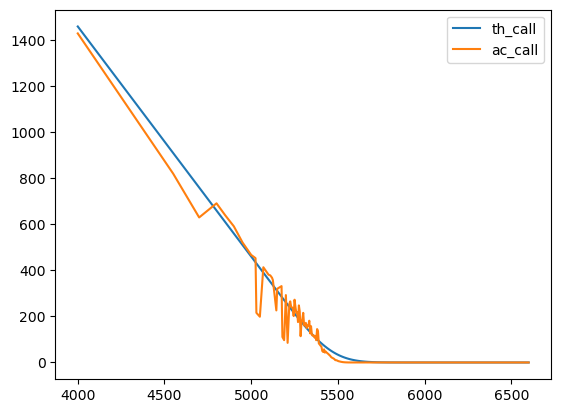

In [15]:
call.plot() #plotting the actual and theoretical call prices

In [16]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2600.0,4.205082e-221
2800.0,1.883556e-179
3400.0,5.579171e-91
3600.0,1.270954e-70
3800.0,9.647401e-54


In [17]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2600.0,0.12
2800.0,0.05
3400.0,0.10
3600.0,0.05
3800.0,0.05


In [18]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5510.0,79.667543,42.06
5515.0,82.976525,51.92
5520.0,86.355842,59.60
5525.0,89.804200,57.30
5530.0,93.320226,60.67
5535.0,96.902477,54.10
5540.0,100.549444,55.90
5550.0,108.031212,65.33
5555.0,111.862729,71.70
5900.0,439.535661,464.11


<Axes: >

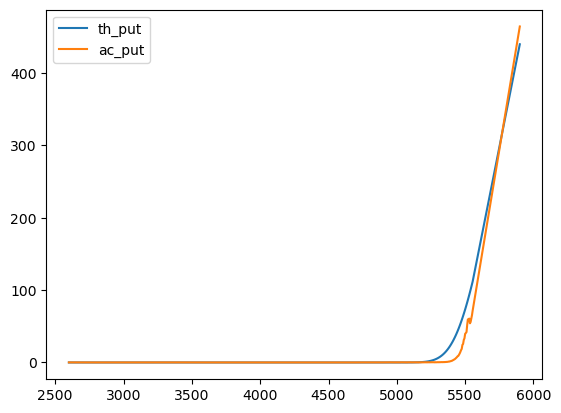

In [19]:
put.plot()